In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for dimensionality reduction
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# for statistical testing
from scipy import stats

# for working with timestamps
from datetime import datetime
from dateutil.parser import parse

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Executive Summary

> **Something goes here.**

### PLANNING

- [X] Planning
- [X] Acquire data
- [ ] Prepare the data
- [ ] Explore the data
- [ ] Modeling

In [2]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

In [3]:
def get_values(df, columns):
    """
    Take a dataframe and a list of columns and
    returns the value counts for the columns.
    """
    for column in columns:
        print(column)
        print('=====================================')
        print(df[column].value_counts(dropna=False))
        print('\n')

def show_values(df, param):
    if param == 'all':
        get_values(df, df.columns)
    else:
        get_values(df, param)

In [4]:
def convert_datatype(df, column, totype):
    df[column] = df[column].astype(totype)
    return df

### ACQUIRE DATA

In [5]:
# Read csv files
df = pd.read_csv('../data/inter/2019_masters_combined.csv')

In [6]:
df.shape
df.dtypes

(1196, 115)

YEAR                                                                 int64
DISTRICT                                                             int64
RATE                                                               float64
GEN FUNDS-TOTAL PAYROLL EXPENDITURES                                 int64
ALL FUNDS-TOTAL PAYROLL EXPENDITURES                                 int64
GEN FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES      int64
ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES      int64
GEN FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES                    int64
ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES                    int64
GEN FUNDS-TOTAL OTHER OPERATING EXPENDITURES                         int64
ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES                         int64
GEN FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ                        int64
ALL FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ                        int64
GEN FUNDS-TOTAL DEBT SERV

In [7]:
data=load_breast_cancer()
data.keys()
 
# Check the output classes
print(data['target_names'])
 
# Check the input attributes
print(data['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

In [10]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
type(data['target'])

numpy.ndarray

In [12]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### PREPARATION

In [13]:
df['SUCCESS'] = np.where(df['RATE'] >= 50, 1, 0)

In [14]:
df_features = df.drop(columns=['YEAR', 'DISTRICT', 'RATE'])

In [15]:
df_features.head()

,GEN FUNDS-TOTAL PAYROLL EXPENDITURES,ALL FUNDS-TOTAL PAYROLL EXPENDITURES,GEN FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,GEN FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES,ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES,GEN FUNDS-TOTAL OTHER OPERATING EXPENDITURES,ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES,GEN FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ,ALL FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ,GEN FUNDS-TOTAL DEBT SERVICE EXPEND BY OBJ,ALL FUNDS-TOTAL DEBT SERVICE EXPEND BY OBJ,GEN FUNDS-TOTAL CAPITAL OUTLAY EXPEND BY OBJ,ALL FUNDS-TOTAL CAPITAL OUTLAY EXPEND BY OBJ,GEN FUNDS-TOTAL NON-OPER EXPENDITURES BY OBJ,ALL FUNDS-TOTAL NON-OPER EXPENDITURES BY OBJ,GEN FUNDS-TOTAL NON-OPER AND OPER OEXPENDITURES BY OBJ,ALL FUNDS-TOTAL NON-OPER AND OPER OEXPENDITURES BY OBJ,"GEN FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95","ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95","GEN FUNDS-INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12","GEN FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","GEN FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21","ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21","GEN FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23","ALL FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23","GEN FUNDS-GUIDANCE & COUNSELING SERVICES EXP, FCT31","ALL FUNDS-GUIDANCE 7 COUNSELING SERVICES EXP, FCT31","GEN FUNDS-SOCIAL WORK SERVICES EXP, FCT32","ALL FUNDS-SOCIAL WORK SERVICES EXP, FCT32","GEN FUNDS-HEALTH SERVICES EXP, FCT33","ALL FUNDS-HEALTH SERVICES EXP, FCT33","GEN FUNDS-TRANSPORTATION EXPENDITURES, FCT34","ALL FUNDS-TRANSPORTATION EXPENDITURES, FCT34","GEN FUNDS-FOOD SERVICE EXPENDITURES, FCT35","ALL FUNDS-FOOD SERVICE EXPENDITURES, FCT35","GEN FUNDS-EXTRACURRICULAR EXPENDITURES, FCT36","ALL FUNDS-EXTRACURRICULAR EXPENDITURES,FCT36","GEN FUNDS-GENERAL ADMINISTRAT EXPEND-FCT41,80,92","ALL FUNDS-GENERAL ADMINISTRAT EXPEND-FCT41,80,92","GEN FUNDS-PLANT MAINTENANCE/OPERA EXPEND, FCT51","ALL FUNDS-PLANT MAINTENANCE/OPERA EXPEND, FCT51","GEN FUNDS-SECURITY/MONITORING SERVICE EXPEND, FCT52","ALL FUNDS-SECURITY/MONITORING SERVICE EXPEND, FCT5","GEN FUNDS-DATA PROCESSING SERVICES EXPEND, FCT53","ALL FUNDS-DATA PROCESSING SERVICES, FCT53","GEN FUNDS-COMMUNITY SERVICES, FCT61","ALL FUNDS-COMMUNITY SERVICES, FCT61",GEN FUNDS-TOTAL OPERATE EXPEND BY FUNCTION,ALL FUNDS-TOTAL OPERATE EXPEND BY FUNCTION,GEN FUNDS-NON-OPER EXP BY FUNCTION(1X-9X)(65XX),ALL FUNDS-NON-OPER EXP BY FUNCTION(1X-9X)(65XX),GEN FUNDS-NON-OPER EXP BY FUNCTION(1X-9X)(66XX),ALL FUNDS-NON-OPER EXP BY FUNCTION(1X-9X)(66XX),GEN FUNDS-TOT NON-OPER EXPEND BY FUNCTION,ALL FUNDS-TOT NON-OPER EXPEND BY FUNCTION,GEN FUNDS-TOT OPER AND NON-OPER EXP BY FUNCTION,ALL FUNDS-TOT OPER AND NON-OPER EXP BY FUNCTION,GEN FUNDS-REGULAR PROGRAM EXPEND--11,ALL FUNDS-REGULAR PROGRAM EXPEND--11,GEN FUNDS-GIFTED/TALENTED PROGRAM EXPEND--21,ALL FUNDS-GIFTED/TALENTED PROGRAM EXPEND--21,GEN FUNDS-CAREER & TECHNOLOGY PGM EXPEND--22,ALL FUNDS-CAREER & TECHNOLOGY PGM EXPEND--22,GEN FUNDS-STUDENTS WITH DISABILITIES PGM EXPEND--23,ALL FUNDS-STUDENTS WITH DISABILITIES PGM EXPEND--23,"GEN FUNDS-STATE COMPENSATORY ED EXPEND--24, 29, 30, 34","ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 29, 30, 34",GEN FUNDS-BILINGUAL PROGRAM EXPEND--25,ALL FUNDS-BILINGUAL PROGRAM EXP--25,GEN FUNDS-HIGH SCHOOL ALLOTMENT PROGRAM EXPEND--91,ALL FUNDS-HIGH SCHOOL ALLOTMENT PROGRAM--91,"GEN FUNDS-PREKINDERGARTEN EXPEND--32,35","ALL FUNDS-PREKINDERGARTEN--32,35",GEN FUNDS-PREKINDERGARTEN EXPEND BILINGUAL--32,GEN FUNDS-PREKINDERGARTEN EXPEND COMP ED--32,GEN FUNDS-PREKINDERGARTEN EXPEND REGULAR--32,GEN FUNDS-PREKINDERGARTEN EXPEND SPECIAL ED--32,ALL FUNDS-PREKINDERGARTEN EXPEND BILINGUAL--32,ALL FUNDS-PREKINDERGARTEN EXPEND COMP ED--32,ALL FUNDS-PREKINDERGARTEN EXPEND REGULAR--32,ALL FUNDS-PREKINDERGARTEN EXPEND SPECIAL ED--32,GEN FUNDS-ATHLETICS PROGRAM EXPEND--91,ALL FUNDS-ATHLETICS PROG

In [16]:
# # Scale data before applying PCA
# scaling=StandardScaler()
 
# # Use fit and transform method
# scaling.fit(df_features)
# Scaled_data=scaling.transform(df_features)
 
# # Set the n_components=3
# principal=PCA(n_components=3)
# principal.fit(Scaled_data)
# x=principal.transform(Scaled_data)
 
# # Check the dimensions of data after PCA
# print(x.shape)

In [17]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df_features)
Scaled_data=scaling.transform(df_features)

StandardScaler()

In [18]:
# Use fit and transform method
scaling.fit(df_features)
Scaled_data=scaling.transform(df_features)

StandardScaler()

In [19]:
pca = PCA(n_components=2)
pca.fit(Scaled_data)
x = pca.transform(Scaled_data)

PCA(n_components=2)

<Figure size 1152x576 with 0 Axes>

(-1.0, 1.0)

(-1.0, 1.0)

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

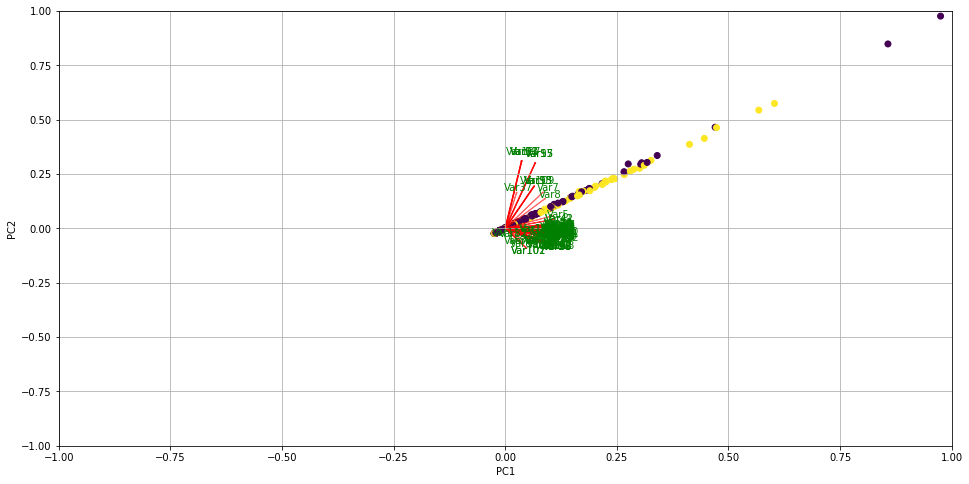

In [20]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = df['SUCCESS'])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.figure(figsize=(16,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(Scaled_data[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [21]:
pca.explained_variance_ratio_

array([0.72055489, 0.05500779])

In [22]:
# "{:.8f}".format(float("7.26937821e-01"))
# "{:.8f}".format(float("5.54839518e-02"))
# "{:.8f}".format(float("3.49864746e-02"))
# "{:.8f}".format(float("2.85693760e-02"))
# "{:.8f}".format(float("2.28630953e-02"))

In [23]:
print(abs( pca.components_ ))

[[1.09882375e-01 1.10058122e-01 1.02648010e-01 1.01956568e-01
  1.03762121e-01 1.08704590e-01 8.36145721e-02 8.79086189e-02
  1.10313025e-01 1.10411260e-01 3.65911201e-02 1.02809543e-01
  6.40156303e-02 9.23307730e-02 6.68362964e-02 1.01689393e-01
  1.10401419e-01 1.10066104e-01 1.09795131e-01 1.09976837e-01
  1.01554793e-01 1.01474016e-01 9.97412545e-02 1.04298686e-01
  1.02775508e-01 1.04254101e-01 1.09316077e-01 1.09139974e-01
  1.07062677e-01 1.08226496e-01 9.06148069e-02 8.90826874e-02
  1.08714257e-01 1.09070425e-01 1.06249300e-01 1.06560517e-01
  2.53417599e-02 1.08634531e-01 1.01126350e-01 1.00293331e-01
  1.05327601e-01 1.05139872e-01 1.09947498e-01 1.09915223e-01
  1.06635023e-01 1.06842020e-01 1.05486066e-01 1.05172220e-01
  6.23496990e-02 7.98206557e-02 1.10313025e-01 1.10411260e-01
  3.65911201e-02 1.02809543e-01 6.40156303e-02 9.23307730e-02
  6.68362964e-02 1.01689393e-01 1.10401419e-01 1.10066104e-01
  1.09554950e-01 1.09533901e-01 6.97318737e-02 7.01460098e-02
  1.0505

In [24]:
model = PCA(n_components=2).fit(Scaled_data)
X_pc = model.transform(Scaled_data)

In [25]:
# number of components
n_pcs= model.components_.shape[0]

In [26]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

In [27]:
df_features.columns

Index(['GEN FUNDS-TOTAL PAYROLL EXPENDITURES',
       'ALL FUNDS-TOTAL PAYROLL EXPENDITURES',
       'GEN FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES',
       'ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES',
       'GEN FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES',
       'ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES',
       'GEN FUNDS-TOTAL OTHER OPERATING EXPENDITURES',
       'ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES',
       'GEN FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ',
       'ALL FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ',
       ...
       'ALL FUNDS-TOTAL OTHER USES', 'GEN FUNDS-INTERGOVERN CHARGES EXPEND',
       'ALL FUNDS-INTERGOVERN CHARGES EXPEND',
       'GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD',
       'ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD',
       'GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD',
       'ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD',
       'GEN FUNDS-TOTAL DISBURSEMENTS', 'ALL FUNDS-TOTAL DI

In [28]:
df_features.head(5).to_csv('../docs/peims_columns.csv', index=False)

In [29]:
initial_feature_names = ['GEN FUNDS-TOTAL PAYROLL EXPENDITURES','ALL FUNDS-TOTAL PAYROLL EXPENDITURES','GEN FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES','ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES','GEN FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES','ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES','GEN FUNDS-TOTAL OTHER OPERATING EXPENDITURES','ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES','GEN FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ','ALL FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ','GEN FUNDS-TOTAL DEBT SERVICE EXPEND BY OBJ','ALL FUNDS-TOTAL DEBT SERVICE EXPEND BY OBJ','GEN FUNDS-TOTAL CAPITAL OUTLAY EXPEND BY OBJ','ALL FUNDS-TOTAL CAPITAL OUTLAY EXPEND BY OBJ','GEN FUNDS-TOTAL NON-OPER EXPENDITURES BY OBJ','ALL FUNDS-TOTAL NON-OPER EXPENDITURES BY OBJ','GEN FUNDS-TOTAL NON-OPER AND OPER OEXPENDITURES BY OBJ','ALL FUNDS-TOTAL NON-OPER AND OPER OEXPENDITURES BY OBJ','GEN FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95','ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95','GEN FUNDS-INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12','ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12','GEN FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13','ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13','GEN FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21','ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21','GEN FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23','ALL FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23','GEN FUNDS-GUIDANCE & COUNSELING SERVICES EXP, FCT31','ALL FUNDS-GUIDANCE 7 COUNSELING SERVICES EXP, FCT31','GEN FUNDS-SOCIAL WORK SERVICES EXP, FCT32','ALL FUNDS-SOCIAL WORK SERVICES EXP, FCT32','GEN FUNDS-HEALTH SERVICES EXP, FCT33','ALL FUNDS-HEALTH SERVICES EXP, FCT33','GEN FUNDS-TRANSPORTATION EXPENDITURES, FCT34','ALL FUNDS-TRANSPORTATION EXPENDITURES, FCT34','GEN FUNDS-FOOD SERVICE EXPENDITURES, FCT35','ALL FUNDS-FOOD SERVICE EXPENDITURES, FCT35','GEN FUNDS-EXTRACURRICULAR EXPENDITURES, FCT36','ALL FUNDS-EXTRACURRICULAR EXPENDITURES,FCT36','GEN FUNDS-GENERAL ADMINISTRAT EXPEND-FCT41,80,92','ALL FUNDS-GENERAL ADMINISTRAT EXPEND-FCT41,80,92','GEN FUNDS-PLANT MAINTENANCE/OPERA EXPEND, FCT51','ALL FUNDS-PLANT MAINTENANCE/OPERA EXPEND, FCT51','GEN FUNDS-SECURITY/MONITORING SERVICE EXPEND, FCT52','ALL FUNDS-SECURITY/MONITORING SERVICE EXPEND, FCT5','GEN FUNDS-DATA PROCESSING SERVICES EXPEND, FCT53','ALL FUNDS-DATA PROCESSING SERVICES, FCT53','GEN FUNDS-COMMUNITY SERVICES, FCT61','ALL FUNDS-COMMUNITY SERVICES, FCT61','GEN FUNDS-TOTAL OPERATE EXPEND BY FUNCTION','ALL FUNDS-TOTAL OPERATE EXPEND BY FUNCTION','GEN FUNDS-NON-OPER EXP BY FUNCTION(1X-9X)(65XX)','ALL FUNDS-NON-OPER EXP BY FUNCTION(1X-9X)(65XX)','GEN FUNDS-NON-OPER EXP BY FUNCTION(1X-9X)(66XX)','ALL FUNDS-NON-OPER EXP BY FUNCTION(1X-9X)(66XX)','GEN FUNDS-TOT NON-OPER EXPEND BY FUNCTION','ALL FUNDS-TOT NON-OPER EXPEND BY FUNCTION','GEN FUNDS-TOT OPER AND NON-OPER EXP BY FUNCTION','ALL FUNDS-TOT OPER AND NON-OPER EXP BY FUNCTION','GEN FUNDS-REGULAR PROGRAM EXPEND--11','ALL FUNDS-REGULAR PROGRAM EXPEND--11','GEN FUNDS-GIFTED/TALENTED PROGRAM EXPEND--21','ALL FUNDS-GIFTED/TALENTED PROGRAM EXPEND--21','GEN FUNDS-CAREER & TECHNOLOGY PGM EXPEND--22','ALL FUNDS-CAREER & TECHNOLOGY PGM EXPEND--22','GEN FUNDS-STUDENTS WITH DISABILITIES PGM EXPEND--23','ALL FUNDS-STUDENTS WITH DISABILITIES PGM EXPEND--23','GEN FUNDS-STATE COMPENSATORY ED EXPEND--24, 29, 30, 34','ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 29, 30, 34','GEN FUNDS-BILINGUAL PROGRAM EXPEND--25','ALL FUNDS-BILINGUAL PROGRAM EXP--25','GEN FUNDS-HIGH SCHOOL ALLOTMENT PROGRAM EXPEND--91','ALL FUNDS-HIGH SCHOOL ALLOTMENT PROGRAM--91','GEN FUNDS-PREKINDERGARTEN EXPEND--32,35','ALL FUNDS-PREKINDERGARTEN--32,35','GEN FUNDS-PREKINDERGARTEN EXPEND BILINGUAL--32','GEN FUNDS-PREKINDERGARTEN EXPEND COMP ED--32','GEN FUNDS-PREKINDERGARTEN EXPEND REGULAR--32','GEN FUNDS-PREKINDERGARTEN EXPEND SPECIAL ED--32','ALL FUNDS-PREKINDERGARTEN EXPEND BILINGUAL--32','ALL FUNDS-PREKINDERGARTEN EXPEND COMP ED--32','ALL FUNDS-PREKINDERGARTEN EXPEND REGULAR--32','ALL FUNDS-PREKINDERGARTEN EXPEND SPECIAL ED--32','GEN FUNDS-ATHLETICS PROGRAM EXPEND--91','ALL FUNDS-ATHLETICS PROGRAM--91','GEN FUNDS-UNDISTRIBUTED PROGRAM EXP--99','ALL FUNDS-UNDISTRIBUTED PROGRAM EXP--99','GEN FUNDS-TOTAL PROGRAM OPERATING EXPENDITURES','ALL FUNDS-TOTAL PROGRAM OPERATING EXPENDITURES','GEN FUNDS-NON OPER EXP BY PIC(65XX)','ALL FUNDS-NON OPER EXP BY PIC(65XX)','GEN FUNDS-NON OPER EXP BY PIC(66XX)','ALL FUNDS-NON OPER EXP BY PIC(66XX)','GEN FUNDS-TOT NON-OPER EXPENDITURES BY PIC','ALL FUNDS-TOT NON-OPER EXPENDITURES BY PIC','GEN FUNDS-TOT OPER AND NON-OPER EXP BY PIC','ALL FUNDS-TOT OPER AND NON-OPER EXP BY PIC','GEN FUNDS-TOTAL OPER EXPENDITURES FOR TD','ALL FUNDS-TOTAL OPER EXPENDITURES FOR TD','GEN FUNDS-EQUITY TRANSFERS FOR TD','EINTRAN4','GEN FUNDS-TOTAL OTHER USES','ALL FUNDS-TOTAL OTHER USES','GEN FUNDS-INTERGOVERN CHARGES EXPEND','ALL FUNDS-INTERGOVERN CHARGES EXPEND','GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD','ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD','GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD','ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD','GEN FUNDS-TOTAL DISBURSEMENTS','ALL FUNDS-TOTAL DISBURSEMENTS'
]
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [30]:
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [31]:
# build the dataframe
df = pd.DataFrame(dic.items())

In [32]:
df.shape

(2, 2)

In [33]:
df

,0,1
0,PC0,ALL FUNDS-TOTAL OPERATING EXPENDITURES BY OBJ
1,PC1,GEN FUNDS-TOTAL DEBT SERVICE EXPEND BY OBJ
